In [2]:
import numpy as np

In [3]:
rnd = np.random
rnd.seed(97)


In [4]:
_lambda = 10**-4

In [5]:
def cal_f(A,b, _lambda, x):
    f = 1/2*np.linalg.norm(np.matmul(A,x)-b,2)**2
    return f

def cal_phi(_lambda, x):
    phi = _lambda*np.linalg.norm(x,1)
    return phi

def cal_F(A, b, _lambda, x):
    f = cal_f(A,b, _lambda, x)
    phi = cal_phi(_lambda, x)
    
    return f + phi

In [6]:
def cal_L(A):
    eigen_values,_ = np.linalg.eig(np.matmul(A.T,A))
    L = max(eigen_values)
    return L

In [7]:
def grad_f(A, b, x):
    result = np.matmul(A.T, (np.matmul(A, x) - b))
    return result

In [8]:
def cal_p(alpha, _lambda, x_i):
    if x_i > alpha*_lambda:

        return x_i - alpha*_lambda
    elif np.abs(x_i) <= alpha*_lambda:
        return 0
    elif x_i < -alpha*_lambda:
        return x_i + alpha*_lambda

In [9]:
def prox_phi(alpha, x):
    prox = np.zeros_like(x)
    for i in range(x.shape[0]):
        prox[i][0] = cal_p(alpha, _lambda, x[i][0])
    
    return prox

In [10]:
def GAPGA(A, b, max_iter = 500, modified = True):
    y = []
    x = []
    z =[]
    F = []
    k = 0
    
    epsilon = 10**-6
    L = cal_L(A)
    kappa = 1/(L+4)
    C = 4*1/kappa
    
    z_0 = rnd.randint(0,1,(n,1))
    z.append(z_0)
    y_0 = z_0.copy()
    y.append(y_0)
    while True:#TODO
#         print('k = ',k)
        if modified == True:
            kappa = 1/(L + k)
        inner_x = y[k] - kappa*grad_f(A,b,y[k])
        x_k = prox_phi(kappa, inner_x)
        x.append(x_k)
        
        tau_k = 4/(k+5)  
        y_kplus1 = tau_k*z[k] + (1-tau_k)*x_k
        y.append(y_kplus1)
        
        
        if modified == True:
            kappa_for_z = 1 / (L + k)
            C = C= 4 * 1 / kappa
            
        kappa_for_z = (k + 1) / C
        inner_z = z[k] - kappa_for_z * grad_f(A, b, y_kplus1)
        z_kplus1 = prox_phi(kappa_for_z, inner_z)
        z.append(z_kplus1)
        
        F_k = cal_F(A, b ,_lambda, x_k)
        F.append(F_k)
        if k>0:
#             diff = np.abs(F[k] - F[k-1])
            
            
# #             diff = 1
#             if diff < epsilon*F[k-1] or k == max_iter:
#                 break

            if np.linalg.norm(x[k] - x[k-1]) < epsilon* (1 + np.linalg.norm(x[k])) or k == max_iter:
#                 GAFGA_info['k'] = k
#                 return GAFGA_info
                break 
            
            
        k = k + 1
        
    GAPGA_info = {
        'k':k,
        'x':x,
        'y':y,
        'z':z,
        'F':F
    }
    return GAPGA_info

In [71]:
def GAPGA2(A, b, max_iter = 500, modified = False):
    y = []
    x = []
    z =[]
    v= []
    F = []
    k = 0
    
    epsilon = 10**-6
    L = cal_L(A)
    kappa = 1/(L+4)
    C = 4*1/kappa
    
    z_0 = rnd.randint(0,1,(n,1))
    z.append(z_0)
    y_0 = z_0.copy()
    y.append(y_0)
    v_0 = 0
    v.append(v_0)
    
    while True:#TODO
#         print('k = ',k)
        if modified == True:
            kappa = 1/(L + k)
        inner_x = y[k] - kappa*grad_f(A,b,y[k])
        x_k = prox_phi(kappa, inner_x)
        x.append(x_k)
        
        tau_k = 4/(k+5)  
        y_kplus1 = tau_k*z[k] + (1-tau_k)*x_k
        y.append(y_kplus1)
        
        v_kplus1 = v[k] + k*grad_f(A,b,y[k+1])
        v.append(v_kplus1)
        
        
        if modified == True:
            kappa_for_z = 1 / (L + k)
            C = C= 4 * 1 / kappa
            
        kappa_for_z = k*(k + 1) / (2 * C)
        inner_z = z[k] - v_kplus1
        z_kplus1 = prox_phi(kappa_for_z, inner_z)
        z.append(z_kplus1)
        
        F_k = cal_F(A, b ,_lambda, x_k)
        F.append(F_k)
        if k>0:
#             diff = np.abs(F[k] - F[k-1])
# #             diff = 1
#             if diff < epsilon*F[k-1] or k == max_iter:
#                 break

            if np.linalg.norm(x[k] - x[k-1]) < epsilon* (1 + np.linalg.norm(x[k])) or k == max_iter:
#                 GAFGA_info['k'] = k
#                 return GAFGA_info
                break 
        k = k + 1
        
    GAPGA_info = {
        'k':k,
        'x':x,
        'y':y,
        'z':z,
        'v':v,
        'F':F
        
    }
    return GAPGA_info

In [70]:
def GAFBA(A, b, c1 = 0.25, c2 = 0.25, max_iter = 500):
    y = []
    x = []
    z =[]
    F = []
    alpha = []
    k = 0
    GAFBA_info = {
        'k':k,
        'x':x,
        'y':y,
        'z':z,
        'alpha':alpha,
        'F':F
    }
    
    epsilon = 10**-6
    L = cal_L(A)
    kappa = 0.9 * 1/L
#     c1 = 0.3
#     c2 = 0.3
    y_0 = np.zeros((n,1))
    x_0 = np.zeros((n,1))
    alpha_0 = 0.5
    y.append(y_0)
    x.append(x_0)
    alpha.append(alpha_0)
    k = 0
    while True:#TODO
#         print('k = ',k)
        # 1.Parameters update:
        beta_k = (c1*alpha[k] +c2*alpha[k])/2
        #alpha_kplus1 = 1/4*(1+ np.sqrt(1 + 4*(alpha[k]**2 - beta_k)))
        
        alpha_kplus1 = 1/2*(1+ np.sqrt(1 + 4*(alpha[k]**2 - beta_k)))
        alpha.append(alpha_kplus1)
        # 2. Find
        inner_x = y[k] - kappa*grad_f(A,b,y[k])
        x_kplus1 = prox_phi(kappa, inner_x)
        x.append(x_kplus1)
        
        y_kplus1 = x_kplus1 + (alpha[k] -1)/(alpha_kplus1)*(x[k+1] - x[k])
        y.append(y_kplus1)
        
        F_k = cal_F(A, b ,_lambda, x[k])
        F.append(F_k)
        if k>0:
        # 1
            if np.linalg.norm(x[k] - x[k-1]) < epsilon* (1 + np.linalg.norm(x[k])) or k == max_iter:
                GAFBA_info['k'] = k
                return GAFBA_info
                break

        #2  
#             diff = np.abs(F[k] - F[k-1])
#             if diff < epsilon*abs(F[k-1]) or k == max_iter:
#                 GAFBA_info['k'] = k
#                 return GAFBA_info
#                 break
        k = k + 1

In [14]:
def ISTA(A,b, max_iter = 1000):
    
    epsilon = 10**-6
    _lambda = 10**-4
    
    x = []
    F = []
    t = []
    k = 0
    y = b
    
    ISTA_info = {
        'k':k,
        'F':F,
        'x':x,
    }
    
    L = cal_L(A)
    x_0 = np.zeros((n,1))
    x.append(x_0)
    k = 0
    F_0 = cal_F(A, b ,_lambda, x_0)
    F.append(F_0)
    while True:
        k = k + 1
        
        #t_k = 1/(k+L)
        t_k = 1/L
        
        t.append(t_k)
        inner_x_k = x[k-1] + t_k*np.matmul(A.T, y - np.matmul(A, x[k-1]))
        x_k = prox_phi(_lambda*t_k, inner_x_k)
        x.append(x_k)
        F_k = cal_F(A, b ,_lambda, x_k)
        F.append(F_k)
        
        # Converge conditon
        
         # 1
#         if np.linalg.norm(x[k] - x[k-1]) < epsilon* (1 + np.linalg.norm(x[k])) or k == max_iter:
#             ISTA_info['k'] = k
#             break
        # 2
        if k > 1:
            diff = np.abs(F[k] - F[k-1])
            if diff < epsilon*abs(F[k-1]) or k == max_iter:
                ISTA_info['k'] = k
                break

    return ISTA_info

In [15]:
def FISTA(A,b, max_iter = 1000):
    
    epsilon = 10**-6
    _lambda = 10**-4
    x = []
    F = []
    t = []
    k = 0
    y = b
    
    ISTA_info = {
        'k':k,
        'F':F,
        'x':x,
    }
    
    L = cal_L(A)
    x_0 = np.zeros((n,1))
    x.append(x_0)
    k = 0
    F_0 = cal_F(A, b ,_lambda, x_0)
    F.append(F_0)
    while True:
        k = k + 1
        
        t_k = 1/(k + L)
        t.append(t_k)
        
        if k > 1:
            v = x[k-1] + (k-2)/(k+1)*(x[k-1] - x[k-2])
            inner_x_k = v + t_k*np.matmul(A.T, y - np.matmul(A, x[k-1]))
            x_k = prox_phi(_lambda*t_k, inner_x_k)
            x.append(x_k)
        else:
            inner_x_k = x[k-1] + t_k*np.matmul(A.T, y - np.matmul(A, x[k-1]))
            x_k = prox_phi(_lambda*t_k, inner_x_k)
            x.append(x_k)
        
        F_k = cal_F(A, b ,_lambda, x_k)
        F.append(F_k)
        
        # converge conditon
        if np.linalg.norm(x[k] - x[k-1]) < epsilon* (1 + np.linalg.norm(x[k])) or k == max_iter:
            ISTA_info['k'] = k
            break
    
    return ISTA_info

## Numerical Experiments

In [40]:
import numpy as np
import os
# import cv2
from skimage import data, io, filters
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
import sklearn
import time

In [48]:
# data = datasets.load_boston()  # load_boston, load_breast_cancer, load_diabetes, load_digits, load_iris, load_wine()
data = sklearn.datasets.load_boston()   ##fetch_california_housing(), fetch_olivetti_faces(), fetch_covtype(),  
                                  ## fetch_kddcup99(), 
                                  ## fetch_covtype(), fetch_lfw_people(), fetch_lfw_pairs(), fetch_rcv1(),  

file_name = 'blood-transfusion-service-center'
# data =fetch_openml(file_name) # Tên các bộ dữ liệu lấy ở https://www.openml.org/search?type=data

A = data['data']
b = data['target']
b = b[:, np.newaxis]
m = A.shape[0]
n= A.shape[1]



In [15]:
## Nếu sinh dữ liệu random thì uncomment cell ở dưới ( select all rồi gõ "CTRL + /" ), điều chỉnh m, n mong muốn

In [16]:
# m = 500
# n = 1000

# A = rnd.rand(m,n)
# b = rnd.rand(m,1)



In [50]:
_lambda = 10**-6
max_iter = 500
epsilon = 10**-3

Đổi dữ liệu về dạng số

Dữ liệu có thể đang ko phải ở dạng số( true/false positive/negative '0'/'1'), cần chuyển nó về dạng số trước. 
Chỉnh sửa cell bên dưới về để sửa b lại cho phù hợp

In [19]:
b = np.where(b=='0',0.0,b) # Thay đổi string `0` thành 0
b = np.where(b=='2',2.0,b) # Thay đổi string `2` thành 2
b = np.where(b=='1',1.0,b) # Thay đổi string `1` thành 1
b = np.where(b=='negative',0.0,b)
b = np.where(b=='positive',1,b)
b = np.where(b=='false',0.0,b)
b = np.where(b=='true',1,b)
b = np.where(b=='good',1,b)
b = np.where(b=='bad',0,b)
b = np.array(b,dtype = float)

In [21]:
#tic = time.time()
#ISTA_results = ISTA(A, b, max_iter)
#toc = time.time()
#ISTA_time = toc -tic

In [55]:
tic = time.time()
GAPGA_results = GAPGA(A ,b, max_iter, modified = False)
toc = time.time()
GAPGA_time = toc -tic

In [33]:
c1 = 0.25
c2 = 0.25
tic = time.time()
GAFBA_results = GAFBA(A, b,c1, c2, max_iter)
toc = time.time()
GAFBA_time = toc -tic

___RESULT____
m = 748, n = 4
FISTA:
 time =0.47771644592285156,
 F = 219.63901470101197,
 num iter = 3531
GAPGA:
 time =0.0029871463775634766,
 F = 325.74663080702743,
 num iter = 1
GAFBA c1 = 0.25, c2 = 0.25:
 time =0.4297971725463867,
 F = 219.63203635069502,
 num iter = 3014


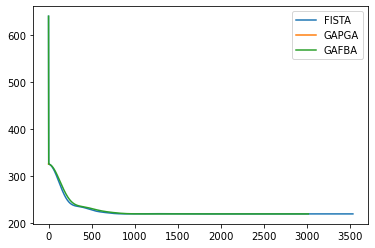

**Author**: Prof. I-Cheng Yeh  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)  
**Please cite**: Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence", Expert Systems with Applications, 2008.   

**Blood Transfusion Service Center Data Set**  
Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan -- this is a classification problem.

To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build an FRMTC model, we selected 748 donors at random from the donor database. 

### Attribute Information  
* V1: Recency - months since last donation
* V2: Frequency - total number of donation
* V3: Monetary - total bl

In [34]:
%%capture cap --no-stderr
print('___RESULT____')
print(f"m = {m}, n = {n}")
#print(f"ISTA:\n time ={ISTA_time},\n F = {ISTA_results['F'][-1]},\n num iter = {ISTA_results['k']}")
print(f"FISTA:\n time ={FISTA_time},\n F = {FISTA_results['F'][-1]},\n num iter = {FISTA_results['k']}")
print(f"GAPGA:\n time ={GAPGA_time},\n F = {GAPGA_results['F'][-1]},\n num iter = {GAPGA_results['k']}")
print(f"GAFBA c1 = {c1}, c2 = {c2}:\n time ={GAFBA_time},\n F = {GAFBA_results['F'][-1]},\n num iter = {GAFBA_results['k']}")

#plt.plot(ISTA_results['F'][:],label = 'ISTA')
plt.plot(FISTA_results['F'][:],label = 'FISTA')
plt.plot(GAPGA_results['F'][:],label = 'GAPGA') # 300 là số vòng lặp muốn xem
plt.plot(GAFBA_results['F'][:], label = 'GAFBA') # 300 là số vòng lặp muốn xem
plt.legend()
plt.savefig(f'fig_{file_name}')
plt.show()

try:
    print(data.DESCR)
except:
    pass

with open(f'{file_name}.txt', 'w') as f:
    f.write(cap.stdout)

# Add nise to image

In [35]:
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

In [ ]:
edges = filters.sobel(image)
io.imshow(edges)
io.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show(close=None, block=None)>

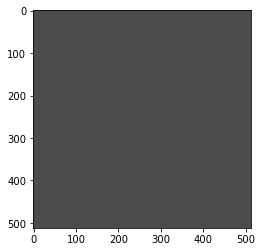

In [39]:
plt.imshow(data, interpolation='nearest')
plt.gray()
plt.show

In [40]:
data = 0.3*np.ones( (512,512,3), dtype=np.uint8)
data[256,256] = [255,0,0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show(close=None, block=None)>

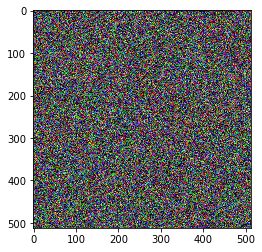

In [41]:
noised = noisy('gauss',data)
plt.imshow(noised, interpolation='nearest')
plt.show